In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt 
from numpy import cos
from numpy import sin
import scipy.integrate as integrate
import time
from skopt import gp_minimize
import pandas as pd

/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
## whole field
def B(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*cos(w*t) +np.array([0,1,0])*sin(w*t) )+\
    v2*(np.array([1,0,0])*cos((n-1)*w*t) +np.array([0,1,0])*sin((n-1)*w*t))+\
    v3*(np.array([0,-1,0])*cos((n-1)*w*t) +np.array([1,0,0])*sin((n-1)*w*t))+\
    v4*(np.array([0,0,1])*sin(n*w*t))+\
    v5*(np.array([0,0,1])*cos(n*w*t))+\
    v6*(np.array([-1,0,0])*cos((n+1)*w*t) +np.array([0,1,0])*sin((n+1)*w*t))+\
    v7*(np.array([0,1,0])*cos((n+1)*w*t) +np.array([1,0,0])*sin((n+1)*w*t)))
    
def B_prime(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*(-1)*sin(w*t) +np.array([0,1,0])*cos(w*t) )*w+\
    v2*(np.array([1,0,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([0,1,0])*(n-1)*cos((n-1)*w*t))*w+\
    v3*(np.array([0,-1,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([1,0,0])*(n-1)*cos((n-1)*w*t))*w+\
    v4*(np.array([0,0,1])*n*cos(n*w*t))*w+\
    v5*(np.array([0,0,1])*(-1)*n*sin(n*w*t))*w+\
    v6*(np.array([-1,0,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([0,1,0])*(n+1)*cos((n+1)*w*t))*w+\
    v7*(np.array([0,1,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([1,0,0])*(n+1)*cos((n+1)*w*t))*w)

def B_prime2(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*(-1)*cos(w*t) +np.array([0,1,0])*(-1)*sin(w*t) )*w*w+\
    v2*(np.array([1,0,0])*(-1)*(n-1)*(n-1)*cos((n-1)*w*t) +np.array([0,1,0])*(-1)*(n-1)*(n-1)*sin((n-1)*w*t))*w*w+\
    v3*(np.array([0,-1,0])*(-1)*(n-1)*(n-1)*cos((n-1)*w*t) +np.array([1,0,0])*(-1)*(n-1)*(n-1)*sin((n-1)*w*t))*w*w+\
    v4*(np.array([0,0,1])*(-1)*n*n*sin(n*w*t))*w*w+\
    v5*(np.array([0,0,1])*(-1)*n*n*cos(n*w*t))*w*w+\
    v6*(np.array([-1,0,0])*(-1)*(n+1)*(n+1)*cos((n+1)*w*t) +np.array([0,1,0])*(-1)*(n+1)*(n+1)*sin((n+1)*w*t))*w*w+\
    v7*(np.array([0,1,0])*(-1)*(n+1)*(n+1)*cos((n+1)*w*t) +np.array([1,0,0])*(-1)*(n+1)*(n+1)*sin((n+1)*w*t))*w*w)







    

In [3]:
lam=1.8686003910229945
v=np.random.uniform(low=-1, high=1, size=(7,))
v=[1,-1,0,0.5,1,-0.5,-1]
n=5
w=1
Y=0.10772427142152266
a=-5/180*np.pi


In [4]:
v=[1,-1,0,0.5,1,-0.5,-1]


## each direction 
def Bx(t):
    return  B(t)[0]
def By(t):
    return  B(t)[1]
def Bz(t):
    return  B(t)[2]


def Bx_p(t):
    return  B_prime(t)[0]
def By_p(t):
    return   B_prime(t)[1]
def Bz_p(t):
    return   B_prime(t)[2]


def Bx_p2(t):
    return  B_prime2(t)[0]
def By_p2(t):
    return   B_prime2(t)[1]
def Bz_p2(t):
    return   B_prime2(t)[2]




In [5]:
## ux1,uy1,
def ux1(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((lam*Bx**2+By**2+Bz**2)*Bx_p+(-1+lam)*Bx*By*By_p)- Bx*Bz_p  )\
    /(Bx**2+By**2+Bz**2)
def uy1(T):
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((Bx**2+lam*By**2+Bz**2)*By_p+(-1+lam)*Bx*By*Bx_p)-By*Bz_p )\
    /(Bx**2+By**2+Bz**2)

## ux2
def ux2(T):
    global lam
    
    
    a1=Bx(T)*Bz(T)*(Bx(T)**2+By(T)**2+Bz(T)**2)**2*(By(T)*Bx_p(T)-Bx(T)*By_p(T))**2/(lam*Bx(T)**2+lam*By(T)**2+Bz(T)**2)**2
    #############
    a2=(2*By(T)*Bz(T)**2*(By(T)*Bx_p(T)-Bx(T)*By_p(T)) *(-Bx(T)*Bz(T)*Bx_p(T)+Bx(T)**2*Bz_p(T)+By(T) *(-Bz(T)*By_p(T) +By(T)*Bz_p(T))))\
    /(lam*Bx(T)**2+lam*By(T)**2+Bz(T)**2)
    
    ##########
    a3= (2*By(T)*Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(-2*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*\
    (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T)+ 
    By(T)*By_p(T)) + (Bx(T)**2 + By(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*
    (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T) + 
    By(T)*By_p(T) + Bz(T)*Bz_p(T)) - 
    2*(Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) +
    Bx(T)*By_p(T))*(lam*Bx(T)*Bx_p(T) + lam*By(T)*By_p(T) + 
    Bz(T)*Bz_p(T)) + (Bz(T)*((2 - lam)*Bx(T)**2 - (-2 + lam)*By(T)**2 + Bz(T)**2)*
    (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*
    (-(Bx(T)**2*Bz_p(T)) + Bx(T)*Bz(T)*Bx_p(T) + 
    By(T)*(Bz(T)*By_p(T) - By(T)*Bz_p(T))))/(Bx(T)**2 + By(T)**2 + Bz(T)**2) + 
    (Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*
    (-(By(T)*Bx_p2(T)) + Bx(T)*By_p2(T))))/\
    ((lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2*(lam*(Bx(T)**2 + By(T)**2) + Bz(T)**2))
    a4=Bx(T)*((Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**2*(By(T)*Bx_p(T) - Bx(T)*By_p(T))**2)\
    /(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2 - 
    2*(Bx(T)*Bx_p(T) + By(T)*By_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + 
    Bx(T)**2*Bz_p(T) + By(T)*(-(Bz(T)*By_p(T)) + By(T)*Bz_p(T))) - 
    (6*(Bx(T)**2 + By(T)**2)*(Bx(T)*Bx_p(T) + By(T)*By_p(T) + 
    Bz(T)*Bz_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + Bx(T)**2*Bz_p(T) + 
    By(T)*(-(Bz(T)*By_p(T)) + By(T)*Bz_p(T))))/
    (Bx(T)**2 + By(T)**2 + Bz(T)**2) + 2*(Bx(T)**2 + By(T)**2)*
    (Bx(T)*Bx_p(T)*Bz_p(T) - 
    Bz(T)*(Bx_p(T)**2 + By_p(T)**2 + Bx(T)*Bx_p2(T) + 
    By(T)*By_p2(T)) + Bx(T)**2*Bz_p2(T) + 
    By(T)*(By_p(T)*Bz_p(T) + By(T)*Bz_p2(T))))
    
    
    return (a1+a2+a3+a4)/(2*(Bx(T)**2+By(T)**2 )**2*(Bx(T)**2+By(T)**2+Bz(T)**2)**1.5)


## uy2
def uy2(T):
    global lam
    return ((By(T)*Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**2*(By(T)*Bx_p(T) - Bx(T)*By_p(T))**2)\
             /(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2 + 
            (2*Bx(T)*Bz(T)**2*(-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*\
            (-(Bx(T)*Bz(T)*Bx_p(T)) + Bx(T)**2*Bz_p(T) + 
            By(T)*(-(Bz(T)*By_p(T)) + By(T)*Bz_p(T))))/
            (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2) - (2*Bx(T)*Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*\
            (-2*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*\
            (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T) + 
            By(T)*By_p(T)) + (Bx(T)**2 + By(T)**2)*(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*\
            (-(By(T)*Bx_p(T)) + Bx(T)*By_p(T))*(Bx(T)*Bx_p(T) + 
            By(T)*By_p(T) + Bz(T)*Bz_p(T)) - 
            2*(Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) + 
            Bx(T)*By_p(T))*(lam*Bx(T)*Bx_p(T) + lam*By(T)*By_p(T) + 
            Bz(T)*Bz_p(T)) + (Bz(T)*((2 - lam)*Bx(T)**2 - (-2 + lam)*By(T)**2 + Bz(T)**2)*\
            (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p(T)) + 
            Bx(T)*By_p(T))*(Bx(T)*Bz(T)*Bx_p(T) - Bx(T)**2*Bz_p(T) + 
            By(T)*(Bz(T)*By_p(T) - By(T)*Bz_p(T))))/ \
            (Bx(T)**2 + By(T)**2 + Bz(T)**2) + (Bx(T)**2 + By(T)**2)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)*\
            (lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)*(-(By(T)*Bx_p2(T)) + 
            Bx(T)*By_p2(T))))/((lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2*\
            (lam*(Bx(T)**2 + By(T)**2) + Bz(T)**2)) + 
            By(T)*((Bz(T)*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**2*(By(T)*Bx_p(T) - 
            Bx(T)*By_p(T))**2)/(lam*Bx(T)**2 + lam*By(T)**2 + Bz(T)**2)**2 - 
            2*(Bx(T)*Bx_p(T) + By(T)*By_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + 
            Bx(T)**2*Bz_p(T) + By(T)*(-(Bz(T)*By_p(T)) + 
            By(T)*Bz_p(T))) - (6*(Bx(T)**2 + By(T)**2)*(Bx(T)*Bx_p(T) + 
            By(T)*By_p(T) + Bz(T)*Bz_p(T))*(-(Bx(T)*Bz(T)*Bx_p(T)) + 
            Bx(T)**2*Bz_p(T) + By(T)*(-(Bz(T)*By_p(T)) + 
            By(T)*Bz_p(T))))/(Bx(T)**2 + By(T)**2 + Bz(T)**2) + 
            2*(Bx(T)**2 + By(T)**2)*(Bx(T)*Bx_p(T)*Bz_p(T) - 
            Bz(T)*(Bx_p(T)**2 + By_p(T)**2 + Bx(T)*Bx_p2(T) + 
            By(T)*By_p2(T)) + Bx(T)**2*Bz_p2(T) + 
            By(T)*(By_p(T)*Bz_p(T) + By(T)*Bz_p2(T)))))/\
            (2*(Bx(T)**2 + By(T)**2)**2*(Bx(T)**2 + By(T)**2 + Bz(T)**2)**(3/2))


In [6]:
## ux1,uy1,
def ux1(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((lam*Bx**2+By**2+Bz**2)*Bx_p+(-1+lam)*Bx*By*By_p)- Bx*Bz_p  )\
    /(Bx**2+By**2+Bz**2)
def uy1(T):
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((Bx**2+lam*By**2+Bz**2)*By_p+(-1+lam)*Bx*By*Bx_p)-By*Bz_p )\
    /(Bx**2+By**2+Bz**2)

In [7]:
## ux2
def ux2(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    Bx_p2,By_p2,Bz_p2=B_prime2(T)
    
    
    a1=Bx*Bz*(Bx**2+By**2+Bz**2)**2*(By*Bx_p-Bx*By_p)**2/(lam*Bx**2+lam*By**2+Bz**2)**2
    #############
    a2=(2*By*Bz**2*(By*Bx_p-Bx*By_p) *(-Bx*Bz*Bx_p+Bx**2*Bz_p+By *(-Bz*By_p +By*Bz_p)))\
    /(lam*Bx**2+lam*By**2+Bz**2)
    
    ##########
    a3= (2*By*Bz*(Bx**2 + By**2 + Bz**2)*(-2*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
    (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p+ 
    By*By_p) + (Bx**2 + By**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*
    (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
    By*By_p + Bz*Bz_p) - 
    2*(Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(-(By*Bx_p) +
    Bx*By_p)*(lam*Bx*Bx_p + lam*By*By_p + 
    Bz*Bz_p) + (Bz*((2 - lam)*Bx**2 - (-2 + lam)*By**2 + Bz**2)*
    (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p) + Bx*By_p)*
    (-(Bx**2*Bz_p) + Bx*Bz*Bx_p + 
    By*(Bz*By_p - By*Bz_p)))/(Bx**2 + By**2 + Bz**2) + 
    (Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*
    (-(By*Bx_p2) + Bx*By_p2)))/\
    ((lam*Bx**2 + lam*By**2 + Bz**2)**2*(lam*(Bx**2 + By**2) + Bz**2))
    a4=Bx*((Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - Bx*By_p)**2)\
    /(lam*Bx**2 + lam*By**2 + Bz**2)**2 - 
    2*(Bx*Bx_p + By*By_p)*(-(Bx*Bz*Bx_p) + 
    Bx**2*Bz_p + By*(-(Bz*By_p) + By*Bz_p)) - 
    (6*(Bx**2 + By**2)*(Bx*Bx_p + By*By_p + 
    Bz*Bz_p)*(-(Bx*Bz*Bx_p) + Bx**2*Bz_p + 
    By*(-(Bz*By_p) + By*Bz_p)))/
    (Bx**2 + By**2 + Bz**2) + 2*(Bx**2 + By**2)*
    (Bx*Bx_p*Bz_p - 
    Bz*(Bx_p**2 + By_p**2 + Bx*Bx_p2 + 
    By*By_p2) + Bx**2*Bz_p2 + 
    By*(By_p*Bz_p + By*Bz_p2)))
    
    
    return (a1+a2+a3+a4)/(2*(Bx**2+By**2 )**2*(Bx**2+By**2+Bz**2)**1.5)



In [8]:
## uy2
def uy2(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    Bx_p2,By_p2,Bz_p2=B_prime2(T)
    return ((By*Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - Bx*By_p)**2)\
             /(lam*Bx**2 + lam*By**2 + Bz**2)**2 + 
            (2*Bx*Bz**2*(-(By*Bx_p) + Bx*By_p)*\
            (-(Bx*Bz*Bx_p) + Bx**2*Bz_p + 
            By*(-(Bz*By_p) + By*Bz_p)))/
            (lam*Bx**2 + lam*By**2 + Bz**2) - (2*Bx*Bz*(Bx**2 + By**2 + Bz**2)*\
            (-2*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
            (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
            By*By_p) + (Bx**2 + By**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
            (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
            By*By_p + Bz*Bz_p) - 
            2*(Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(-(By*Bx_p) + 
            Bx*By_p)*(lam*Bx*Bx_p + lam*By*By_p + 
            Bz*Bz_p) + (Bz*((2 - lam)*Bx**2 - (-2 + lam)*By**2 + Bz**2)*\
            (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p) + 
            Bx*By_p)*(Bx*Bz*Bx_p - Bx**2*Bz_p + 
            By*(Bz*By_p - By*Bz_p)))/ \
            (Bx**2 + By**2 + Bz**2) + (Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*\
            (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p2) + 
            Bx*By_p2)))/((lam*Bx**2 + lam*By**2 + Bz**2)**2*\
            (lam*(Bx**2 + By**2) + Bz**2)) + 
            By*((Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - 
            Bx*By_p)**2)/(lam*Bx**2 + lam*By**2 + Bz**2)**2 - 
            2*(Bx*Bx_p + By*By_p)*(-(Bx*Bz*Bx_p) + 
            Bx**2*Bz_p + By*(-(Bz*By_p) + 
            By*Bz_p)) - (6*(Bx**2 + By**2)*(Bx*Bx_p + 
            By*By_p + Bz*Bz_p)*(-(Bx*Bz*Bx_p) + 
            Bx**2*Bz_p + By*(-(Bz*By_p) + 
            By*Bz_p)))/(Bx**2 + By**2 + Bz**2) + 
            2*(Bx**2 + By**2)*(Bx*Bx_p*Bz_p - 
            Bz*(Bx_p**2 + By_p**2 + Bx*Bx_p2 + 
            By*By_p2) + Bx**2*Bz_p2 + 
            By*(By_p*Bz_p + By*Bz_p2))))/\
            (2*(Bx**2 + By**2)**2*(Bx**2 + By**2 + Bz**2)**(3/2))



In [9]:
import scipy.integrate as integrate
def target(vv):
    global v
    v=vv
    dx1=np.mean([ux1(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dx2=np.mean([ux2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dy1=np.mean([uy2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    return -np.absolute(dy1/(dx1+dx2))*dy1

In [80]:
test=np.random.uniform(low=-1, high=1, size=(20000,7))

In [81]:
import multiprocessing as mp
from multiprocessing import Pool

start = time.time()

p = Pool(mp.cpu_count())
result=p.map(target, test)
end = time.time()
print(end - start)

1368.5381298065186


Process ForkPoolWorker-118:
Process ForkPoolWorker-113:
Process ForkPoolWorker-116:
Process ForkPoolWorker-115:
Process ForkPoolWorker-112:
Process ForkPoolWorker-114:
Process ForkPoolWorker-111:
Process ForkPoolWorker-117:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.ru

In [82]:
np.savetxt("ux1_0_result_3.csv", result, delimiter=",")

In [83]:
np.savetxt("ux1_0_input_3.csv", test, delimiter=",")

(0, 50)

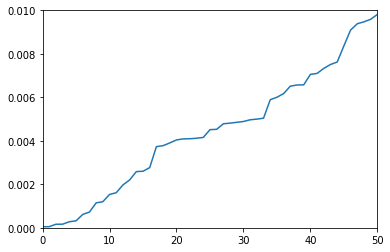

In [99]:
plt.plot(np.arange(20000),np.sort(np.absolute(result)))
plt.ylim(0,0.01)
plt.xlim(0,50)

In [58]:
start = time.time()
sol=np.zeros([5000,7])
n=0
for i in range(5000):
    vv=np.random.uniform(low=-1, high=1, size=(7,))
    if np.absolute(target(vv))<0.01:
        sol[n]=vv
        n=n+1
        
end = time.time()
print(end - start)       

1362.1091680526733


In [66]:
save=sol[1:34]

In [67]:
np.savetxt("ux1zero_3.csv", save, delimiter=",")

In [11]:
import time

start = time.time()

test=np.mean([uy2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
end = time.time()
print(end - start)

0.37114810943603516


In [12]:
start = time.time()
integrate.romberg(uy2, 0, 2*np.pi)
end = time.time()
print(end - start)

0.3934609889984131


/anaconda/lib/python3.6/site-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.497745e-01
  AccuracyWarning)


In [69]:
sam= np.random.uniform(low=-1, high=1, size=(7,))

In [70]:
start = time.time()
Target=target(sam)
end = time.time()
print(end - start)
print(Target)

0.9208917617797852
2763.6302721171287


In [10]:
import cma

In [11]:
import time
from neat.parallel import ParallelEvaluator

# parrellel computing CMA-es

In [12]:
for i in range(20):

    with cma.fitness_transformations.EvalParallel(6) as eval_all:
        es = cma.CMAEvolutionStrategy(np.random.uniform(low=-1, high=1, size=(7,)), 0.5,{'maxfevals':500,'bounds': [[-1,-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1,1]],\
                                                                                      'verb_disp': 200  ,'verb_log': 200  } )
        while not es.stop():
            X = es.ask()
            es.tell(X, eval_all(target, X))  
            # was: es.tell(X, [fitness(x) for x in X])
            es.disp()
    np.savetxt("cma_es_5fold_parrelel_"+str(i)+".csv", es.result.xbest, delimiter=",")


(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=562318, Fri Jan 31 14:48:48 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.047030869567579e+01 1.0e+00 4.69e-01  4e-01  5e-01 0:02.6
    2     18 -1.276408640938497e+02 1.2e+00 4.53e-01  4e-01  5e-01 0:05.2
    3     27 -2.611285435352465e+01 1.3e+00 3.99e-01  4e-01  4e-01 0:07.9
    5     45 -1.579266628747364e+04 1.5e+00 3.84e-01  3e-01  4e-01 0:12.7
    7     63 -4.220839675106289e+03 1.7e+00 3.69e-01  3e-01  4e-01 0:17.6
   10     90 -2.894940429633225e+03 1.8e+00 3.07e-01  2e-01  3e-01 0:25.1
   13    117 -6.440104634903274e+04 1.9e+00 2.53e-01  2e-01  3e-01 0:32.8
   16    144 -9.094840028758463e+03 2.2e+00 1.82e-01  1e-01  2e-01 0:40.5
   20    180 -3.158165232107123e+04 2.3e+00 2.09e-01  1e-01  2e-01 0:51.0
   24    216 -1.092457020853236e+03 2.8e+00 2.39e-01  1e-01  3e-01 1:01.7
   28    252 -5.703918793286536e+03 3.3e+00 2.35e-01  1e-01  3e-01 1:13.4
   32    288 -2.68050777

   29    261 -1.671133070873883e+05 2.1e+00 8.91e-02  6e-02  8e-02 1:22.6
   34    306 -2.172180945456155e+04 2.4e+00 8.34e-02  5e-02  7e-02 1:36.0
   39    351 -2.680942422863045e+05 2.5e+00 5.92e-02  4e-02  5e-02 1:49.4
   45    405 -4.490661929106990e+06 2.8e+00 3.58e-02  2e-02  3e-02 2:05.5
   51    459 -1.071171190592984e+06 2.8e+00 2.66e-02  1e-02  2e-02 2:21.4
   56    504 -8.103190953324432e+05 3.2e+00 1.70e-02  6e-03  1e-02 2:35.2
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=658354, Fri Jan 31 15:04:40 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -3.693568892401960e+02 1.0e+00 5.01e-01  5e-01  5e-01 0:03.3
    2     18 -2.342072281480150e+02 1.2e+00 4.78e-01  4e-01  5e-01 0:06.1
    3     27 -1.130013332919068e+02 1.3e+00 4.68e-01  4e-01  5e-01 0:08.8
    5     45 -5.128633493453182e+02 1.6e+00 4.49e-01  4e-01  5e-01 0:14.2
    7     63 -3.978411780082475e+02 1.9e+00 3.99e-01  3e-01  5e-01 0:19.5
    9     81 -1.22050380

Process ForkPoolWorker-64:
Process ForkPoolWorker-63:
Process ForkPoolWorker-66:
Process ForkPoolWorker-65:
Process ForkPoolWorker-62:
Process ForkPoolWorker-61:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda/lib/python

KeyboardInterrupt: 

In [145]:
start = time.time()
v=np.random.uniform(low=-1, high=1, size=(7,))
res_2 = cma.fmin(target,\
v,\
0.5, options = {'maxfevals':500,\
'bounds': [[-1,-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1,1]],'verb_disp': 100  ,'verb_log': 100  }  )  #doctest: +ELLIPSIS

end = time.time()
print(end - start)

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=433444, Tue Jan 28 17:00:18 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -8.122451485466529e-04 1.0e+00 4.97e-01  5e-01  5e-01 0:06.8
    2     18 -2.042020257706484e-03 1.3e+00 5.57e-01  5e-01  7e-01 0:13.4
    3     27 -9.687796138269707e-03 1.6e+00 5.67e-01  5e-01  7e-01 0:20.0
    4     36 -3.691764464627389e-02 1.7e+00 5.85e-01  5e-01  7e-01 0:26.5
    5     45 -1.039384226903801e-02 1.7e+00 5.55e-01  5e-01  6e-01 0:33.2
    6     54 -2.047623335980596e-02 1.7e+00 5.32e-01  4e-01  6e-01 0:39.8
    7     63 -3.637862281075650e-02 1.8e+00 5.45e-01  4e-01  6e-01 0:46.5
    9     81 -2.371777874505723e-02 1.9e+00 5.66e-01  4e-01  7e-01 0:59.7
   11     99 -1.320196386847876e-02 2.1e+00 5.68e-01  4e-01  6e-01 1:12.9
   13    117 -3.136928526687792e-03 2.1e+00 5.67e-01  4e-01  6e-01 1:26.0
   15    135 -6.139557091752935e-02 2.1e+00 5.21e-01  4e-01  6e-01 1:39.2
   17    153 -1.10886775

In [34]:
np.savetxt("cma_es_0128_01.csv", v, delimiter=",")

In [23]:
start = time.time()
for i in range(1):
    res = gp_minimize(target,                  # the function to minimize
                      [(-1.0, 1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0),(-1.0,1.0)],      # the bounds on each dimension of x
                      acq_func="EI",      # the acquisition function
                      n_calls=400,         # the number of evaluations of f 
                      n_random_starts=7,  # the number of random initialization points
                      random_state=np.random.randint(200))   # the random seed
    np.savetxt("gp_parrelel_"+str(i)+".csv",res.x, delimiter=",")


    

end = time.time()
print(end - start)

665.5169169902802


In [25]:
res.x

[0.9090588865113562,
 0.9817090927031067,
 -0.9268314415055119,
 -0.954706195780398,
 0.9599113583378105,
 0.3131862937441152,
 0.9803026779646953]

# parrellel computing CMA-gp

In [30]:
from skopt import Optimizer
from skopt.space import Real
from joblib import Parallel, delayed
# example objective taken from skopt
from skopt.benchmarks import branin

In [40]:


optimizer = Optimizer(
    dimensions=[Real(-1.0, 1.0), Real(-1, 1),Real(-1.0, 1.0), Real(-1, 1),Real(-1.0, 1.0), Real(-1, 1),Real(-1, 1)],
    random_state=np.random.randint(200),
    base_estimator='gp',
    acq_func="EI"
)

start = time.time()
for i in range(10): 
    x = optimizer.ask(n_points=6)  # x is a list of n_points points    
    y = Parallel(n_jobs=6)(delayed(branin)(v) for v in x)  # evaluate points in parallel
    optimizer.tell(x, y)
end = time.time()
print(end - start)

# takes ~ 20 sec to get here
print(min(optimizer.yi))  # print the best objective found 


29.24449110031128
27.702905548512433


In [39]:
integrate.romberg(ux1, 0, 2*np.pi)

/anaconda/lib/python3.6/site-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.794379e-04
  AccuracyWarning)


-0.06761093995511877

In [107]:
target(v1[69])

-1.5407144415628522

In [108]:
v1[69]

array([-0.0329524 , -0.98833797, -0.02524205,  0.39393939, -0.96940308,
       -0.94494608, -0.42238877])

In [119]:
res_2=np.array([-0.0329524 , -0.98833797, -0.02524205,  0.40073567, -0.96940308,
       -0.94494608, -0.42238877])

In [120]:
res_2[6]=0

In [121]:
v1=[res_2+np.array([0,0,0,0,0,i,0]) for i in np.linspace(-1,1,100)]

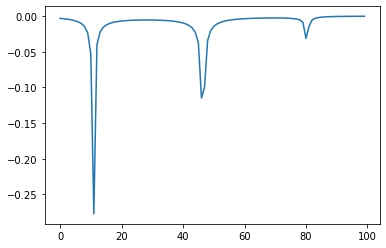

In [122]:
plt.plot([target(v1[i]) for i in range(100)] )

In [109]:
np.savetxt("gp_7.csv", v, delimiter=",")

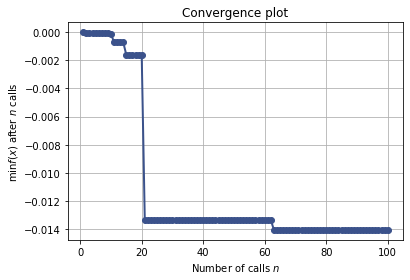

In [41]:
from skopt.plots import plot_convergence

plot_convergence(res)

In [39]:
data=pd.read_csv('fit.dat',header=None, sep=' ')

Text(0, 0.5, 'f(x)')

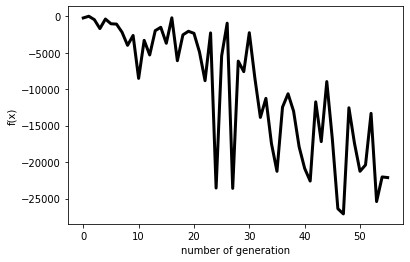

In [54]:
plt.plot(np.arange(56),data[data.columns[6]],c="k",linewidth=3)
plt.xlabel("number of generation")
plt.ylabel("f(x)")
